In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import functools
%matplotlib inline

# Gathering

## Three different files

* CSV File (twitter)
* programmatic download from website (img_pred)
* API's JSON data (tweets)

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
2181,668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,10,None,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None


In [3]:
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [4]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [5]:
import requests
import os

#Creating folder using python
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#Getting the URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#To view the raw data
response.content

#Saving the file to the computer
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [6]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### NOTE: Do not run the following cell as it will take long time to excute, the cell after is reading the file directly

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twi.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets.sample(5)

,tweet_id,retweets,favorites
1098,735256018284875776,985,3654
976,749417653287129088,1885,6683
1433,696900204696625153,1150,3477
1905,674416750885273600,157,728
1831,676098748976615425,1606,3257


# Assessment

Three files to work on:
* twitter: tweet's text and dog category
* img_pred: result of neural networ prediction
* tweets: favorite counts and retweet data

In [8]:
twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
574,801127390143516673,NaN,NaN,2016-11-22 18:17:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Anakin. He strives to r...,7.757333e+17,4.196984e+09,2016-09-13 16:30:07 +0000,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None


In [9]:
tweets.sample(5)

,tweet_id,retweets,favorites
1832,676089483918516224,476,1422
1143,726887082820554753,1670,4172
1674,682032003584274432,2275,7187
492,813172488309972993,2225,10334
1096,735635087207878657,2642,6747


In [10]:
img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
823,693155686491000832,https://pbs.twimg.com/media/CZ6VatdWwAAwHly.jpg,3,Shih-Tzu,0.697480,True,Lhasa,0.200151,True,Tibetan_terrier,0.090970,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,patio,0.272972,False,window_screen,0.131295,False,boathouse,0.046393,False
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
1302,752917284578922496,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,1,German_shepherd,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True


In [11]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2351 non-null   object
 1   retweets   2351 non-null   int64 
 2   favorites  2351 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [14]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
tweets.describe()

,retweets,favorites
count,2351.000000,2351.000000
mean,3131.396852,8111.893662
std,5238.522870,11989.498195
min,0.000000,0.000000
25%,617.000000,1419.000000
50%,1453.000000,3594.000000
75%,3622.500000,10115.500000
max,79007.000000,132170.000000


In [17]:
all_columns = pd.Series(list(twitter) + list(img_pred) + list(tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [18]:
twitter.name.value_counts().head(5)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Name: name, dtype: int64

In [19]:
twitter[twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
assert [img_pred.duplicated() == False]

In [21]:
assert [tweets.duplicated() == False]

No duplicates in these DataFrames

In [22]:
tweets['tweet_id'].sample(5)

265     841439858740625411
1339    704499785726889984
1864    675153376133427200
303     836001077879255040
706     784826020293709826
Name: tweet_id, dtype: object

In [23]:
twitter[twitter.tweet_id == 892177421306343426]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [24]:
tweets.sample(5)

,tweet_id,retweets,favorites
744,779377524342161408,3577,9790
1975,672975131468300288,1008,1799
1978,672964561327235073,695,1515
366,828650029636317184,1536,10421
227,847978865427394560,3629,0


# Reporting

### Quality issues: 
#### Twitter df:
* A lot of missing data data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id)
* For coulmns (rating_numerator and rating_denomrator) these are zero values and extreme values
* Maxmimum values of (rating_numerator and rating_denomrator) might be typos.
* Columns data types have to be restructred, for example:
    * tweet_id is int
    * timestamp is str
* incorrect dog names
* the href (HTML tag) appears in the source coulmn
* some tweets don't have useful data

#### img_pred df:
* Egyptian cat row might be a typo
* some values in p1 coulmn are not relevant.
* Words separeated with underscore in p1, p2, and p3
#### tweets df:
* these columns could be combined with the above dataframes under tweet_id merge.
* retweets and favorites are floats.


### Tidiness issues: 
#### Twitter df:
* Column redundancy
* None values should be replaces with NaN
* Dog type columns could be combined under (Type)
#### tweets df:
* these columns could be combined with the above dataframes under tweet_id merge.

# Cleaning



In [25]:
# Create copies of the three data frames
twitter_clean = twitter.copy()
img_pred_clean = img_pred.copy()
tweets_clean = tweets.copy()

Define:

Change datatype and use regex to extract the ratings numerators again.

In [26]:
# Code
twitter_clean['rating_numerator'] = twitter_clean['rating_numerator'].astype('float')

In [27]:
twitter_clean['rating_numerator'] = twitter_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

In [28]:
#Test
print(twitter_clean.rating_numerator.dtype)

object


In [29]:
twitter_clean.loc[twitter_clean['tweet_id'] == 883482846933004288, 'rating_numerator']

45    13.5
Name: rating_numerator, dtype: object

Define: Columns 'doggo', 'floofer', 'pupper', 'puppo' to be groubed into a singe column

In [30]:
# Code
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_clean[i] = twitter_clean[i].replace('None', '')

In [31]:
# use cat to combine 
twitter_clean['dog_stage'] = twitter_clean.doggo.str.cat(twitter_clean.floofer).str.cat(twitter_clean.pupper).str.cat(twitter_clean.puppo)

# drop the four old colomns
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_clean['dog_stage'] = twitter_clean['dog_stage'].replace('', np.nan)

In [32]:
# Test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   object 
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

Define: Select rows wehre the column "in_reply_to_status_id" is Null

In [33]:
#Code
twitter_clean = twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]

In [34]:
# test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   object 
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  dog_stage                   372 n

Define: Dropping unneded (missing too much values) columns using drop function.

In [35]:
# code
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [36]:
# Test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   expanded_urls       2274 non-null   object
 5   rating_numerator    2278 non-null   object
 6   rating_denominator  2278 non-null   int64 
 7   name                2278 non-null   object
 8   dog_stage           372 non-null    object
dtypes: int64(2), object(7)
memory usage: 178.0+ KB


Define: I do not need 'expanded_urls' in my analysis. use drop function


In [37]:
# Code
twitter_clean = twitter_clean.drop(['expanded_urls'], axis = 1)

In [38]:
# Test
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2278 non-null   int64 
 1   timestamp           2278 non-null   object
 2   source              2278 non-null   object
 3   text                2278 non-null   object
 4   rating_numerator    2278 non-null   object
 5   rating_denominator  2278 non-null   int64 
 6   name                2278 non-null   object
 7   dog_stage           372 non-null    object
dtypes: int64(2), object(6)
memory usage: 160.2+ KB


Define: exclude all the extreme values from numertor and denuminator


In [39]:
#Code

twitter_clean = twitter_clean[twitter_clean['rating_denominator'] >= 10 ]
twitter_clean = twitter_clean[twitter_clean['rating_denominator'] < 20 ]

In [40]:
len(twitter_clean[twitter_clean['rating_denominator'] > 20 ])

0

Define: combine the dog type into one column and drop the extra 4 columns

In [41]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2263 non-null   int64 
 1   timestamp           2263 non-null   object
 2   source              2263 non-null   object
 3   text                2263 non-null   object
 4   rating_numerator    2263 non-null   object
 5   rating_denominator  2263 non-null   int64 
 6   name                2263 non-null   object
 7   dog_stage           372 non-null    object
dtypes: int64(2), object(6)
memory usage: 159.1+ KB


In [42]:
# Code:
twitter_clean =  twitter_clean.replace('None', np.nan)

In [43]:
twitter_clean.dog_stage.value_counts()

pupper          242
doggo            80
puppo            28
doggopupper      11
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

Define: Value None replaced with NaN 

In [44]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2263 non-null   int64 
 1   timestamp           2263 non-null   object
 2   source              2263 non-null   object
 3   text                2263 non-null   object
 4   rating_numerator    2263 non-null   object
 5   rating_denominator  2263 non-null   int64 
 6   name                1605 non-null   object
 7   dog_stage           372 non-null    object
dtypes: int64(2), object(6)
memory usage: 159.1+ KB


In [45]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Define: Descriptive columns

In [46]:
# Code
img_pred_clean= img_pred_clean.rename(columns={'p1':'Probability1', 
                                               'p2':'Probability2', 
                                               'p3':'Probability3'})
# Test
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2075 non-null   int64  
 1   jpg_url       2075 non-null   object 
 2   img_num       2075 non-null   int64  
 3   Probability1  2075 non-null   object 
 4   p1_conf       2075 non-null   float64
 5   p1_dog        2075 non-null   bool   
 6   Probability2  2075 non-null   object 
 7   p2_conf       2075 non-null   float64
 8   p2_dog        2075 non-null   bool   
 9   Probability3  2075 non-null   object 
 10  p3_conf       2075 non-null   float64
 11  p3_dog        2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2351 non-null   object
 1   retweets   2351 non-null   int64 
 2   favorites  2351 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


Define: convert tweet_id to str for the twitter and img_pred df

In [48]:
# Code
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)


In [49]:
# Test
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2351 non-null   object
 1   retweets   2351 non-null   int64 
 2   favorites  2351 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


Define: Join all dfs on te tweet_id column

In [50]:
# Code
full_df = pd.merge(twitter_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')
full_df = pd.merge(full_df, tweets_clean,
                        how = 'inner', on = 'tweet_id')


In [51]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2033
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2034 non-null   object 
 1   timestamp           2034 non-null   object 
 2   source              2034 non-null   object 
 3   text                2034 non-null   object 
 4   rating_numerator    2034 non-null   object 
 5   rating_denominator  2034 non-null   int64  
 6   name                1490 non-null   object 
 7   dog_stage           318 non-null    object 
 8   jpg_url             2034 non-null   object 
 9   img_num             2034 non-null   int64  
 10  Probability1        2034 non-null   object 
 11  p1_conf             2034 non-null   float64
 12  p1_dog              2034 non-null   bool   
 13  Probability2        2034 non-null   object 
 14  p2_conf             2034 non-null   float64
 15  p2_dog              2034 non-null   bool   
 16  Probab

Define: convert timestamp to data time

In [52]:
# Code
full_df.timestamp = pd.to_datetime(full_df.timestamp)

In [53]:
# Test
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2033
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   object             
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   rating_numerator    2034 non-null   object             
 5   rating_denominator  2034 non-null   int64              
 6   name                1490 non-null   object             
 7   dog_stage           318 non-null    object             
 8   jpg_url             2034 non-null   object             
 9   img_num             2034 non-null   int64              
 10  Probability1        2034 non-null   object             
 11  p1_conf             2034 non-null   float64            
 12  p1_dog              2034 non-null 

Define: dog_class to category

In [54]:
# Code
full_df.dog_stage = full_df.dog_stage.astype('category')

In [55]:
# Test
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2033
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   object             
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   rating_numerator    2034 non-null   object             
 5   rating_denominator  2034 non-null   int64              
 6   name                1490 non-null   object             
 7   dog_stage           318 non-null    category           
 8   jpg_url             2034 non-null   object             
 9   img_num             2034 non-null   int64              
 10  Probability1        2034 non-null   object             
 11  p1_conf             2034 non-null   float64            
 12  p1_dog              2034 non-null 

In [56]:
full_df.name.value_counts()

a             54
Charlie       11
Lucy          10
Cooper        10
Oliver        10
              ..
Logan          1
Glacier        1
incredibly     1
Ricky          1
Pubert         1
Name: name, Length: 932, dtype: int64

Define: replace name 'a' by NaN

In [57]:
# Code:
full_df.name =  full_df.name.replace('a', np.nan)

In [58]:
# Test
full_df.name.value_counts()

Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny         10
              ..
Logan          1
Glacier        1
incredibly     1
Ricky          1
Pubert         1
Name: name, Length: 931, dtype: int64

In [59]:
full_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,Probability2,p2_conf,p2_dog,Probability3,p3_conf,p3_dog,retweets,favorites
367,817120970343411712,2017-01-05 21:29:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Name a more iconic quartet... I'll wait. 13/10...,13,10,NaN,NaN,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,...,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True,2999,13316
1032,710588934686908417,2016-03-17 22:09:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Beemo. He's a Chubberflop mix. 12/10 w...,12,10,Beemo,NaN,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,...,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True,2095,4938
552,786595970293370880,2016-10-13 15:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dale. He's a real spookster. Did me qu...,11,10,Dale,NaN,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,...,0.709512,True,Cardigan,0.287178,True,chow,0.000570,True,3572,10453
1355,684188786104872960,2016-01-05 01:44:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",10,10,NaN,NaN,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,...,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True,1335,3805
257,833124694597443584,2017-02-19 01:23:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,12,10,Gidget,pupper,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,3,...,0.710523,True,kelpie,0.106102,True,shopping_cart,0.055475,False,5485,22038


In [60]:
full_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1993
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Define: source column inconvient data

In [61]:
# Code
full_df.source = full_df.source.str.strip('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">')

In [62]:
full_df.source.value_counts()

Twitter for iP    1993
Twitter Web C       30
TweetD              11
Name: source, dtype: int64

In [63]:
full_df.source = full_df.source.replace('Twitter for iP', 'Twitter for iPhone')
full_df.source = full_df.source.replace('Twitter Web C', 'Twitter Web Client')
full_df.source = full_df.source.replace('TweetD', 'TweetDeck')
# Test
full_df.source.value_counts()

Twitter for iPhone    1993
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [64]:
full_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,Probability2,p2_conf,p2_dog,Probability3,p3_conf,p3_dog,retweets,favorites
849,743222593470234624,2016-06-15 23:24:09+00:00,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper....,12,10,NaN,pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,...,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True,2146,6757
316,824663926340194305,2017-01-26 17:02:56+00:00,Twitter for iPhone,This is Wilson. Named after the volleyball. He...,13,10,Wilson,NaN,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,...,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True,1984,11058
541,788178268662984705,2016-10-18 00:41:57+00:00,Twitter for iPhone,Atlas is back and this time he's got doggles. ...,13,10,NaN,NaN,https://pbs.twimg.com/media/CvAr88kW8AEKNAO.jpg,2,...,0.735480,True,Pomeranian,0.075101,True,Arctic_fox,0.036072,False,2463,8055
509,793210959003287553,2016-10-31 22:00:04+00:00,Twitter for iPhone,This is Maude. She's the h*ckin happiest wasp ...,10,10,Maude,NaN,https://pbs.twimg.com/media/CwINKJeW8AYHVkn.jpg,1,...,0.874431,False,French_bulldog,0.018759,True,Boston_bull,0.015134,True,3278,9946
1822,670040295598354432,2015-11-27 00:43:49+00:00,Twitter for iPhone,😂😂😂 10/10 for the dog and the owner https://t....,10,10,NaN,NaN,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,...,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True,118,797


In [65]:
full_df.rating_denominator.value_counts()

10    2032
11       2
Name: rating_denominator, dtype: int64

In [66]:
full_df.rating_numerator.value_counts()

12       470
10       427
11       409
13       273
9        150
8         95
7         52
14        38
5         33
6         32
3         19
4         15
2          9
1          4
0          1
1776       1
420        1
15         1
11.27      1
11.26      1
9.75       1
13.5       1
Name: rating_numerator, dtype: int64

In [67]:
full_df.dog_stage.value_counts()

pupper          209
doggo            67
puppo            23
doggopupper      10
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

In [68]:
full_df= full_df.rename(columns={'Probability1':'Breed_prediction1', 
                                 'Probability2':'Breed_prediction2', 
                                 'Probability3':'Breed_prediction3'})
full_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,Breed_prediction2,p2_conf,p2_dog,Breed_prediction3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8831,39442
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6470,33747
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4291,25418
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8907,42806
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9690,40946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2030,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,146,310
2031,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
2032,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132



Define: remove underscore Breed_prob columns

In [69]:
# Code
full_df['Breed_prediction1'] = full_df['Breed_prediction1'].str.replace('_', ' ')
full_df['Breed_prediction2'] = full_df['Breed_prediction2'].str.replace('_', ' ')
full_df['Breed_prediction3'] = full_df['Breed_prediction3'].str.replace('_', ' ')


In [70]:
# Test
full_df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,Breed_prediction2,p2_conf,p2_dog,Breed_prediction3,p3_conf,p3_dog,retweets,favorites
1394,681981167097122816,2015-12-29 23:32:35+00:00,Twitter for iPhone,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,12,10,Jimothy,NaN,https://pbs.twimg.com/media/CXbiQHmWcAAt6Lm.jpg,1,...,0.452577,True,golden retriever,0.403420,True,beagle,0.069486,True,1155,3019
1560,675354435921575936,2015-12-11 16:40:19+00:00,Twitter Web Client,Everyone needs to watch this. 13/10 https://t....,13,10,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,...,0.303415,False,golden retriever,0.181351,True,Brittany spaniel,0.162084,True,18862,35049
601,778408200802557953,2016-09-21 01:39:11+00:00,Twitter for iPhone,RIP Loki. Thank you for the good times. You wi...,14,10,NaN,NaN,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,...,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True,4978,15066
1773,670789397210615808,2015-11-29 02:20:29+00:00,Twitter for iPhone,Two obedient dogs here. Left one has extra leg...,9,10,NaN,NaN,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,...,0.295966,True,basset,0.143527,True,bluetick,0.138992,True,254,698
1843,669567591774625800,2015-11-25 17:25:28+00:00,Twitter for iPhone,Meet Kollin. He's a Parakeetian Badminton from...,9,10,Kollin,NaN,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,...,0.980511,True,toy terrier,0.009166,True,miniature pinscher,0.002659,True,61,246


## Storing the data

In [71]:
#Store the clean DataFrame in a CSV file
full_df.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Visualization 

In [72]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2033
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2034 non-null   object             
 1   timestamp           2034 non-null   datetime64[ns, UTC]
 2   source              2034 non-null   object             
 3   text                2034 non-null   object             
 4   rating_numerator    2034 non-null   object             
 5   rating_denominator  2034 non-null   int64              
 6   name                1436 non-null   object             
 7   dog_stage           318 non-null    category           
 8   jpg_url             2034 non-null   object             
 9   img_num             2034 non-null   int64              
 10  Breed_prediction1   2034 non-null   object             
 11  p1_conf             2034 non-null   float64            
 12  p1_dog              2034 non-null 

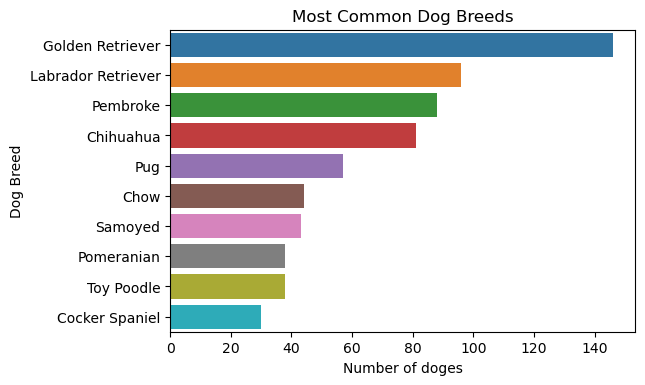

In [73]:
# Plot counts of the 10 most common dog breeds
top_breeds = (full_df.Breed_prediction1.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'Dog_Breed', 'Breed_prediction1': 'total'}))
top_breeds['Dog_Breed'] = top_breeds['Dog_Breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='Dog_Breed', data=top_breeds);
ax.set_title('Most Common Dog Breeds');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Number of doges');

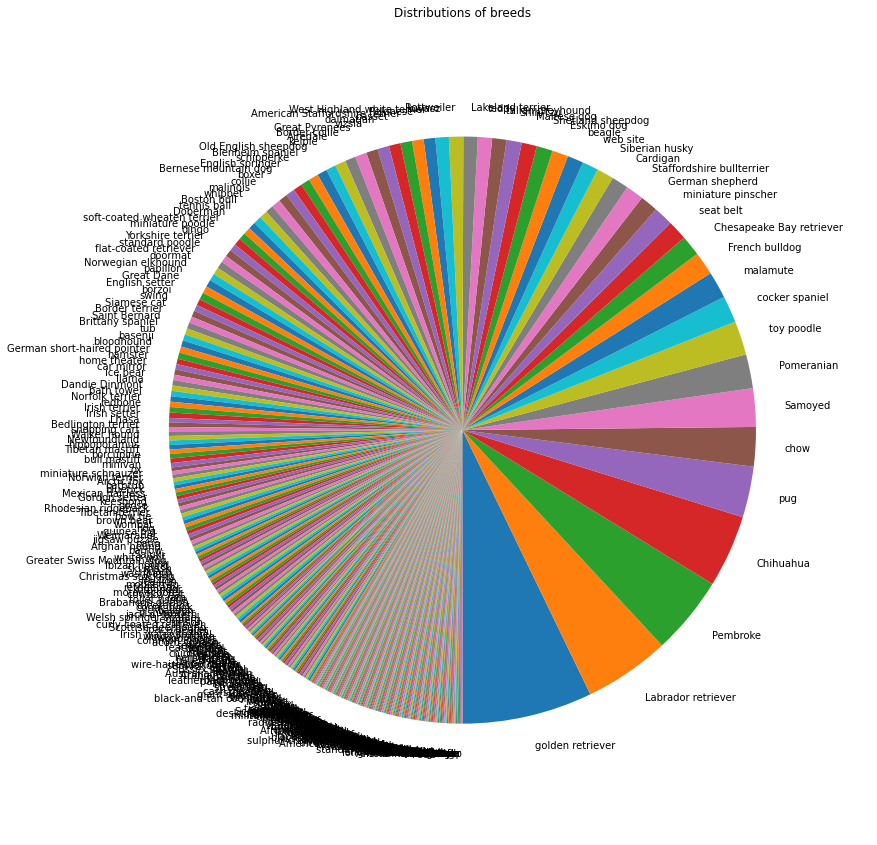

In [74]:
# Piechart
plt.rcParams['figure.figsize']=(15,15)

import matplotlib.pyplot as plt
full_df.Breed_prediction1.value_counts(sort=True).plot.pie(startangle=270, pctdistance=0.8, radius = 0.9)
plt.title('Distributions of breeds')
plt.ylabel('')
plt.show();

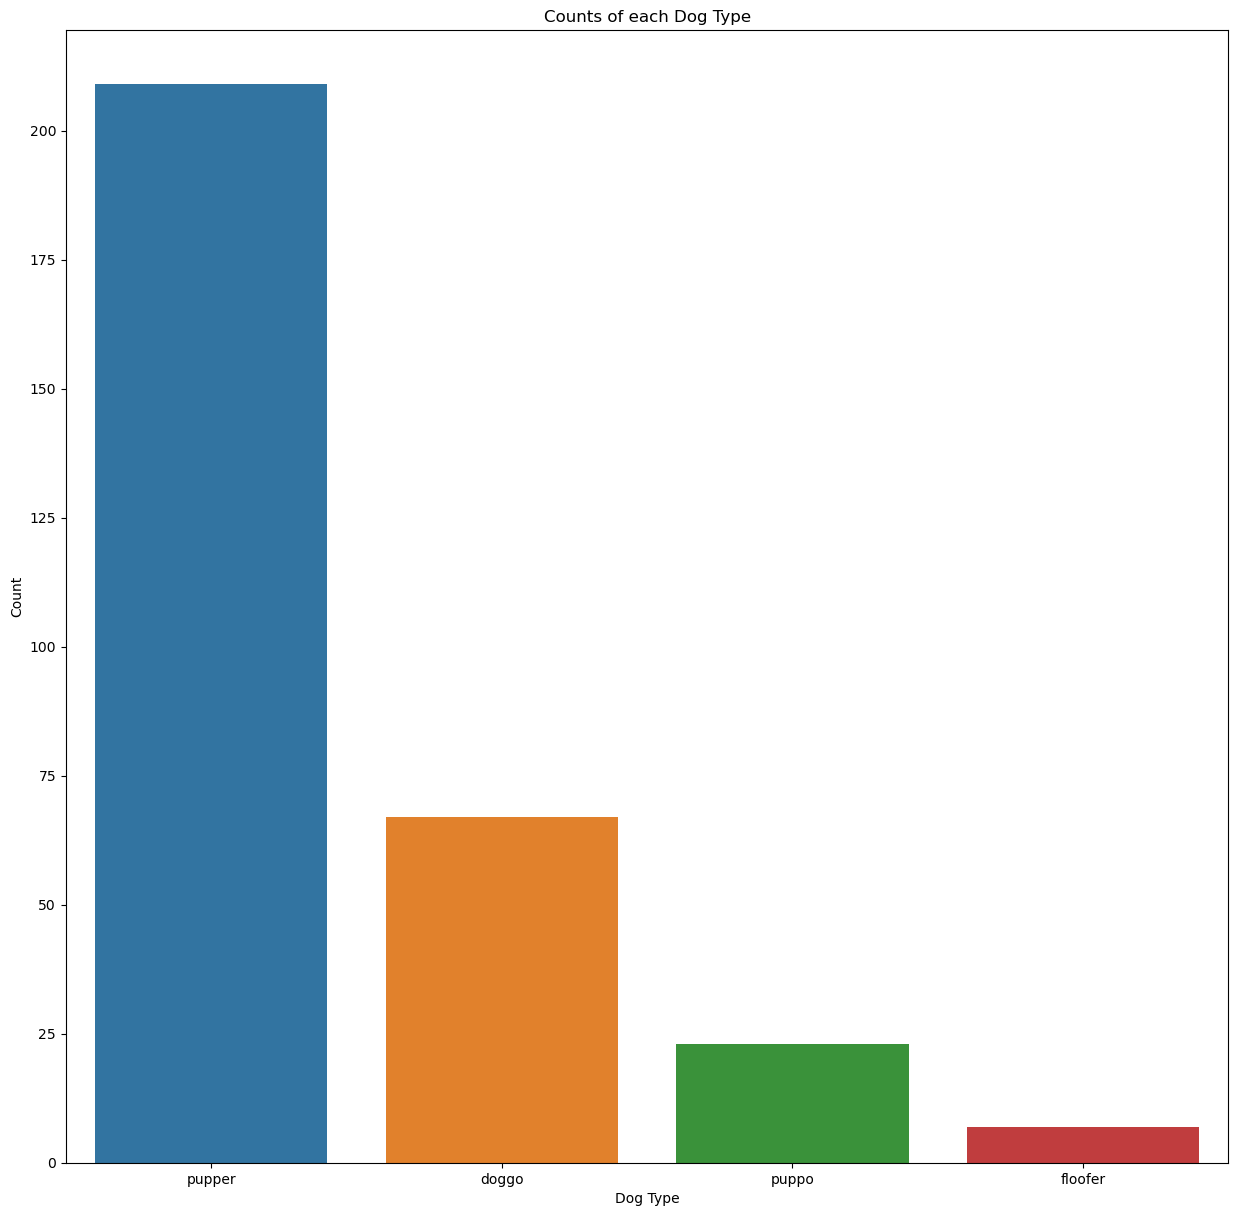

In [75]:
# Define seperate dog classes
dog_type_mask = full_df['dog_stage'].notnull()
dog_type_raw = full_df.dog_stage.loc[dog_type_mask].str.split(',').tolist()
dog_class = list(map(lambda x: x.strip(), itertools.chain.from_iterable(dog_type_raw)))
dog_class = np.array(dog_class)

# Plot
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
plt.figure(dpi=100);
ax = sns.countplot(x=dog_class, order=plot_category_order);
ax.set_title('Counts of each Dog Type');
ax.set_ylabel('Count');
ax.set_xlabel('Dog Type');


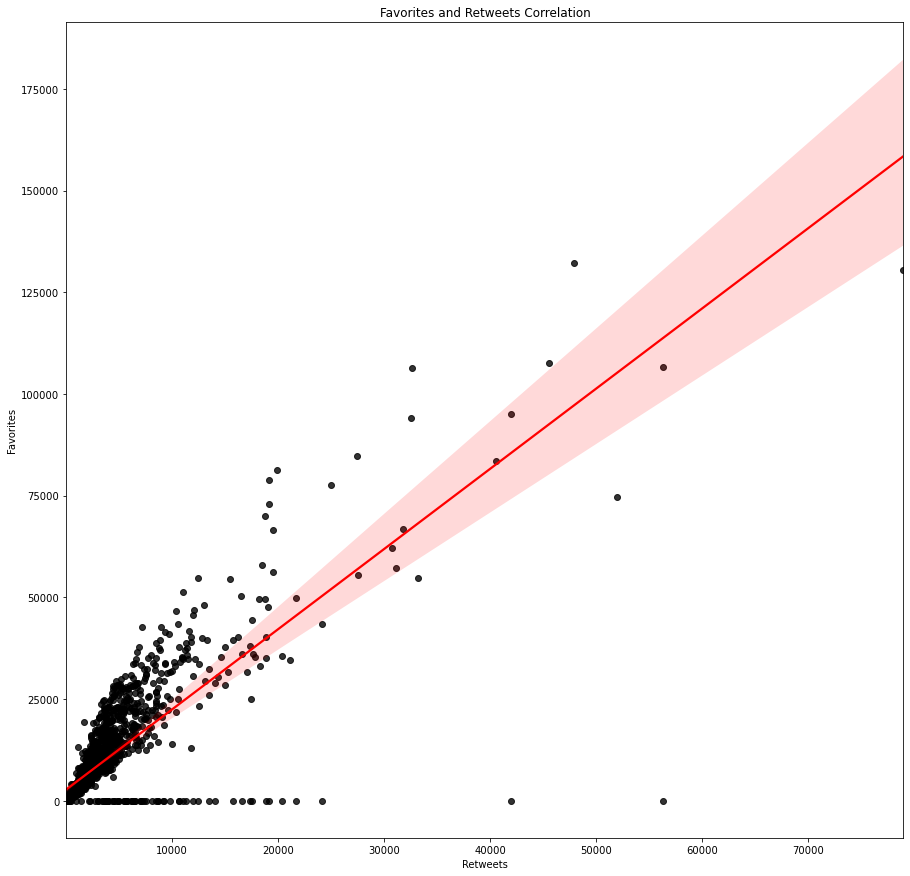

In [76]:
# Correlation between favorites and retweets

g = sns.regplot(x=full_df.retweets, y=full_df.favorites, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Favorites and Retweets Correlation")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()